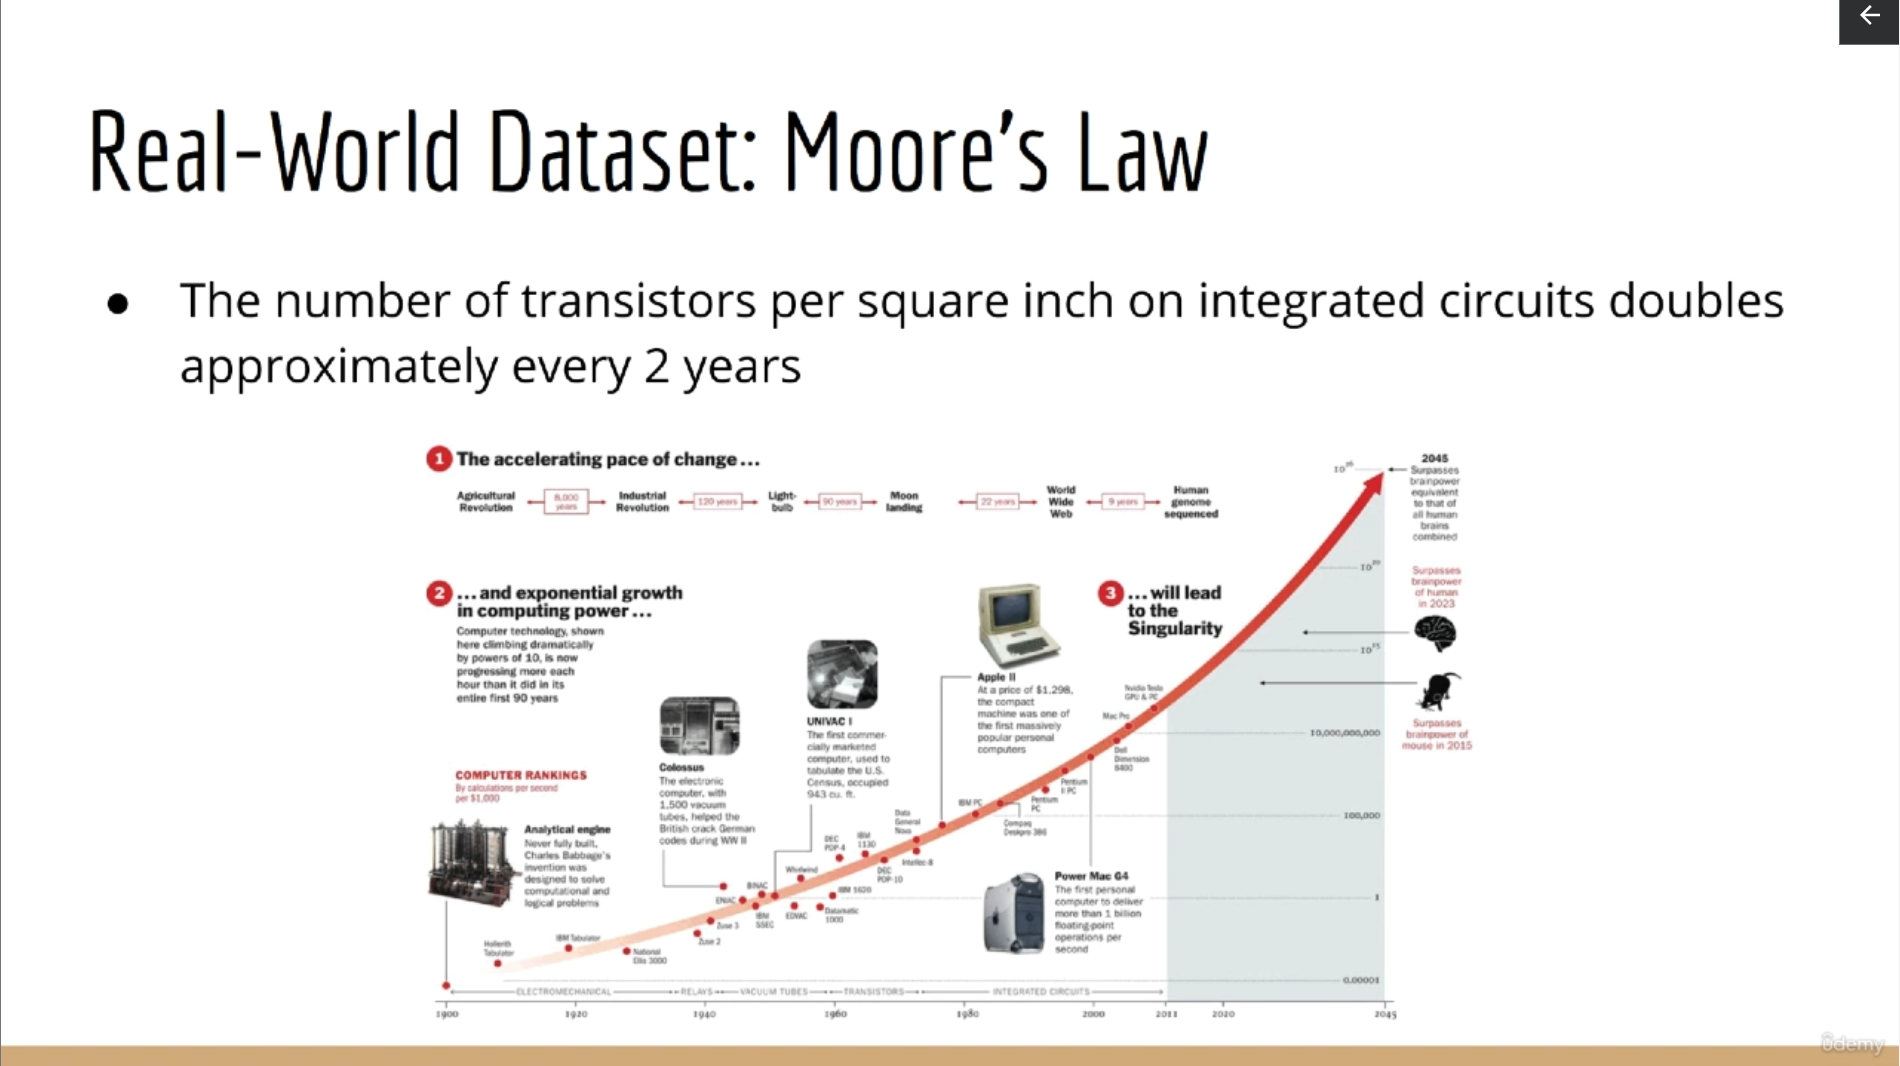

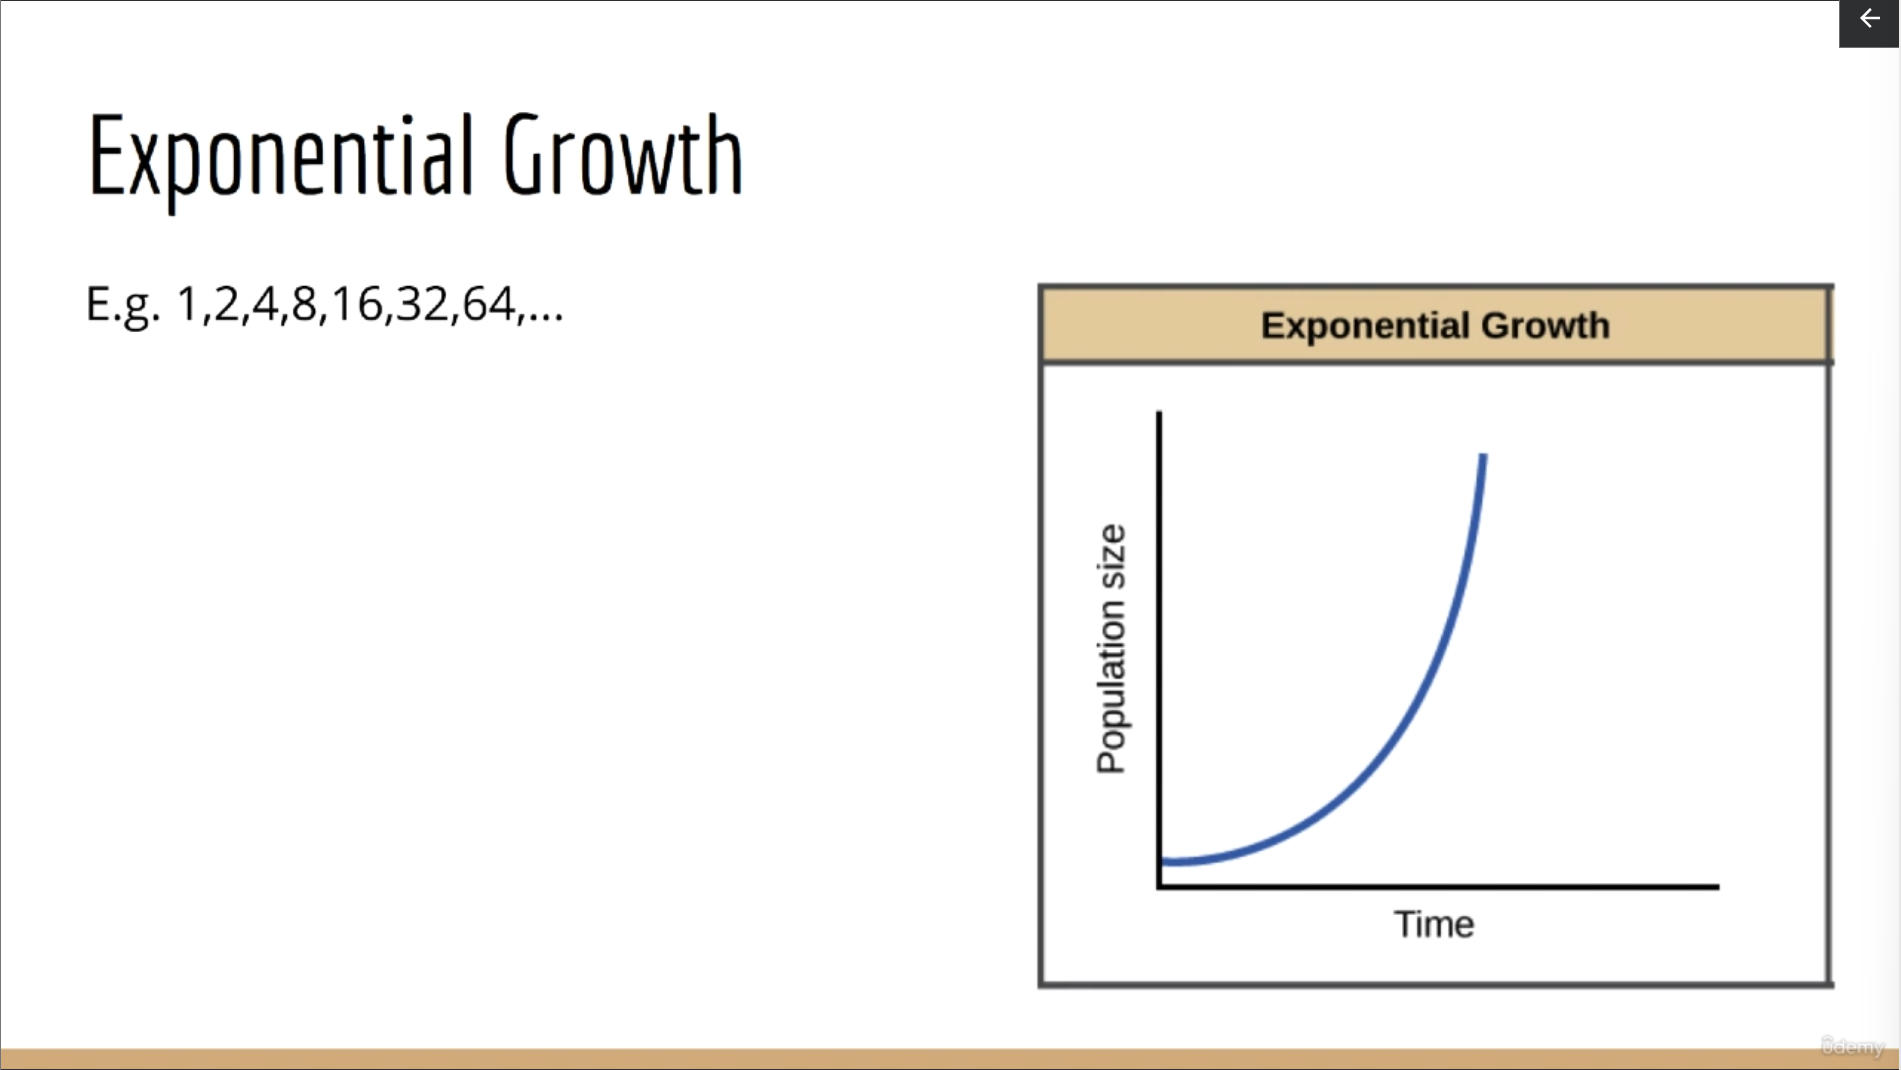

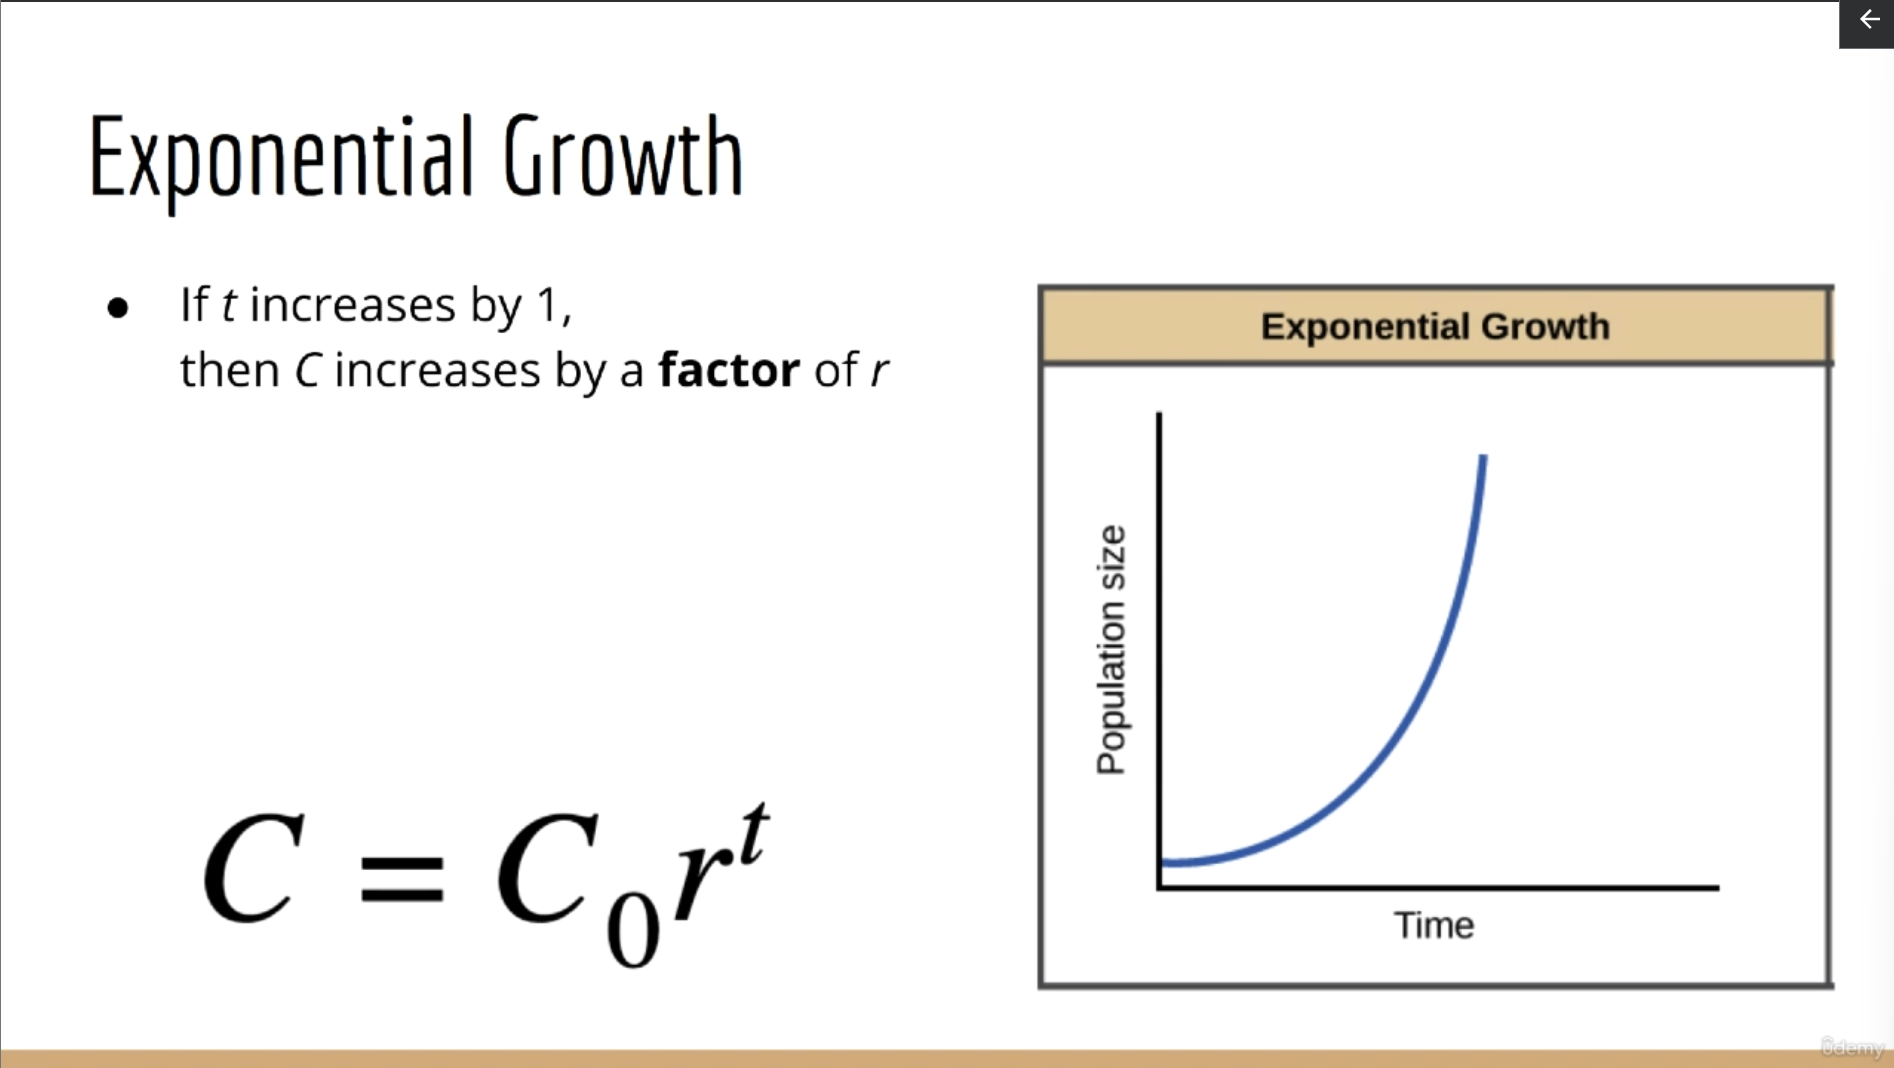

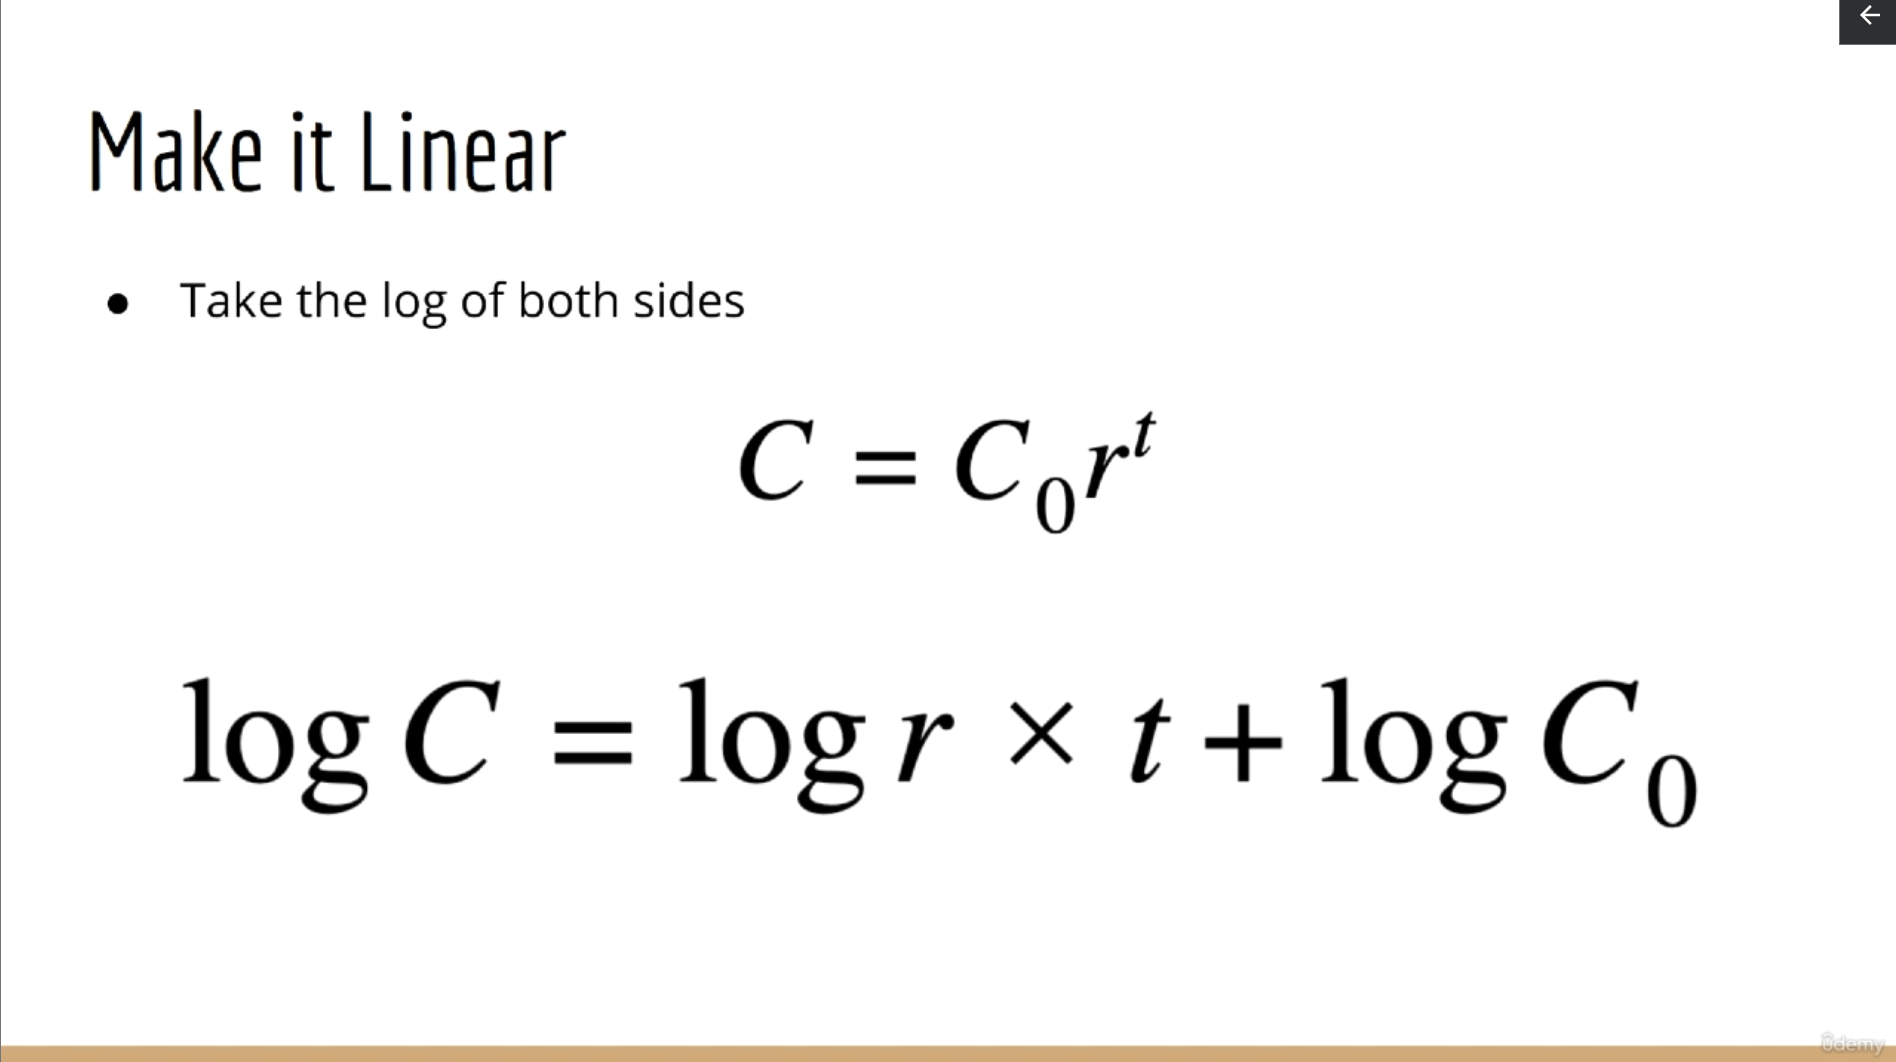

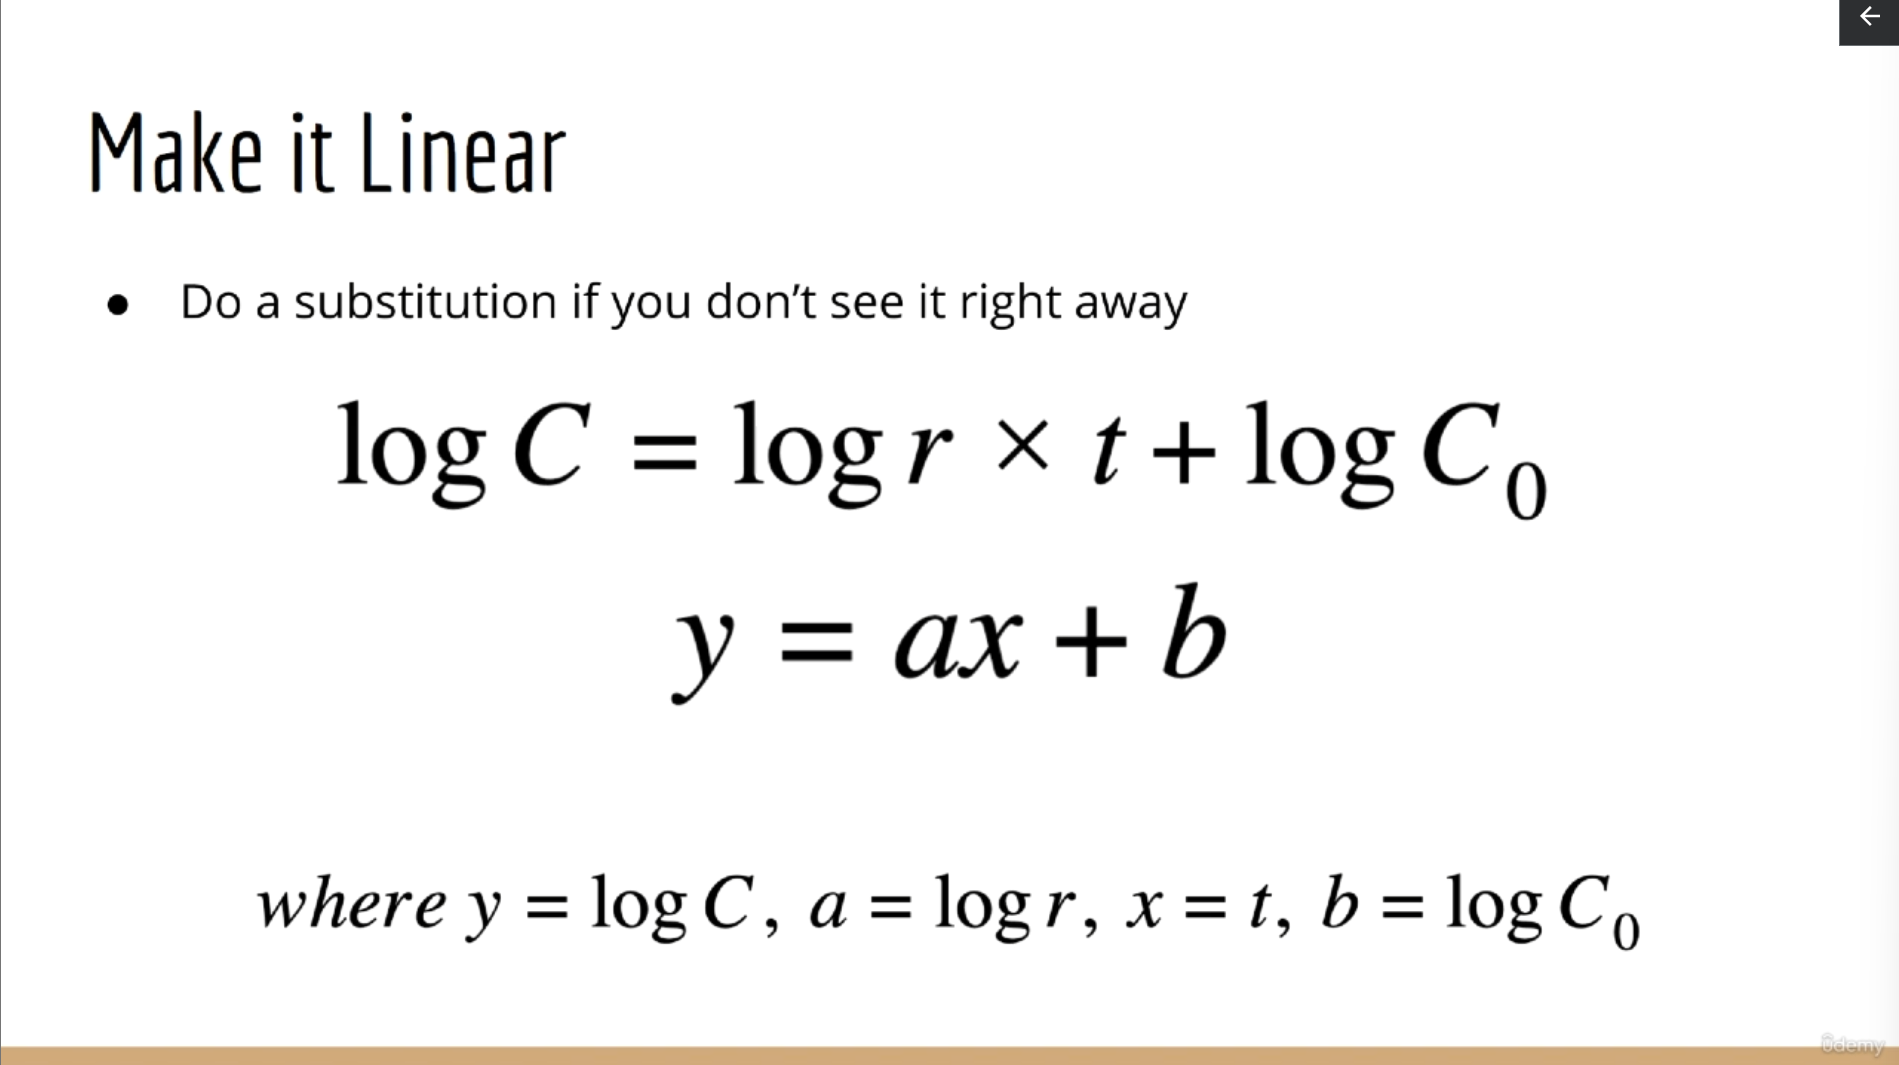

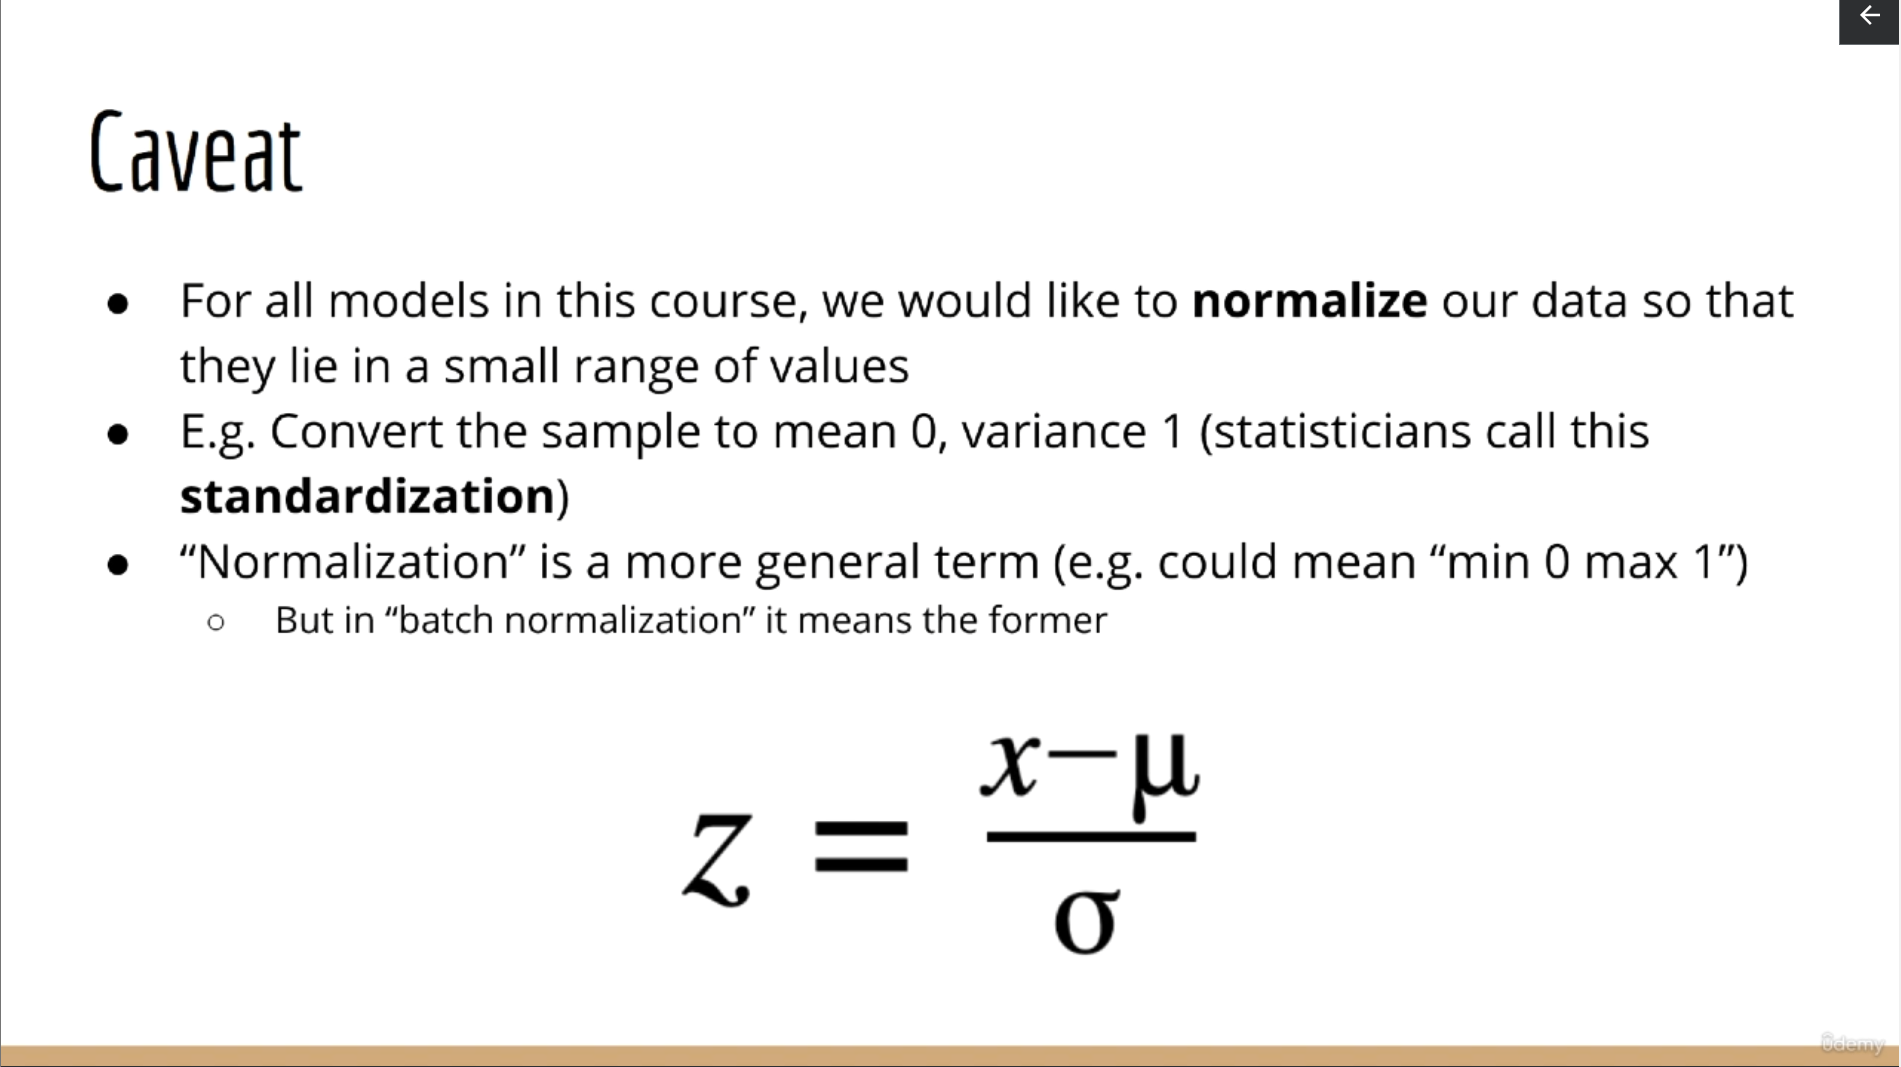

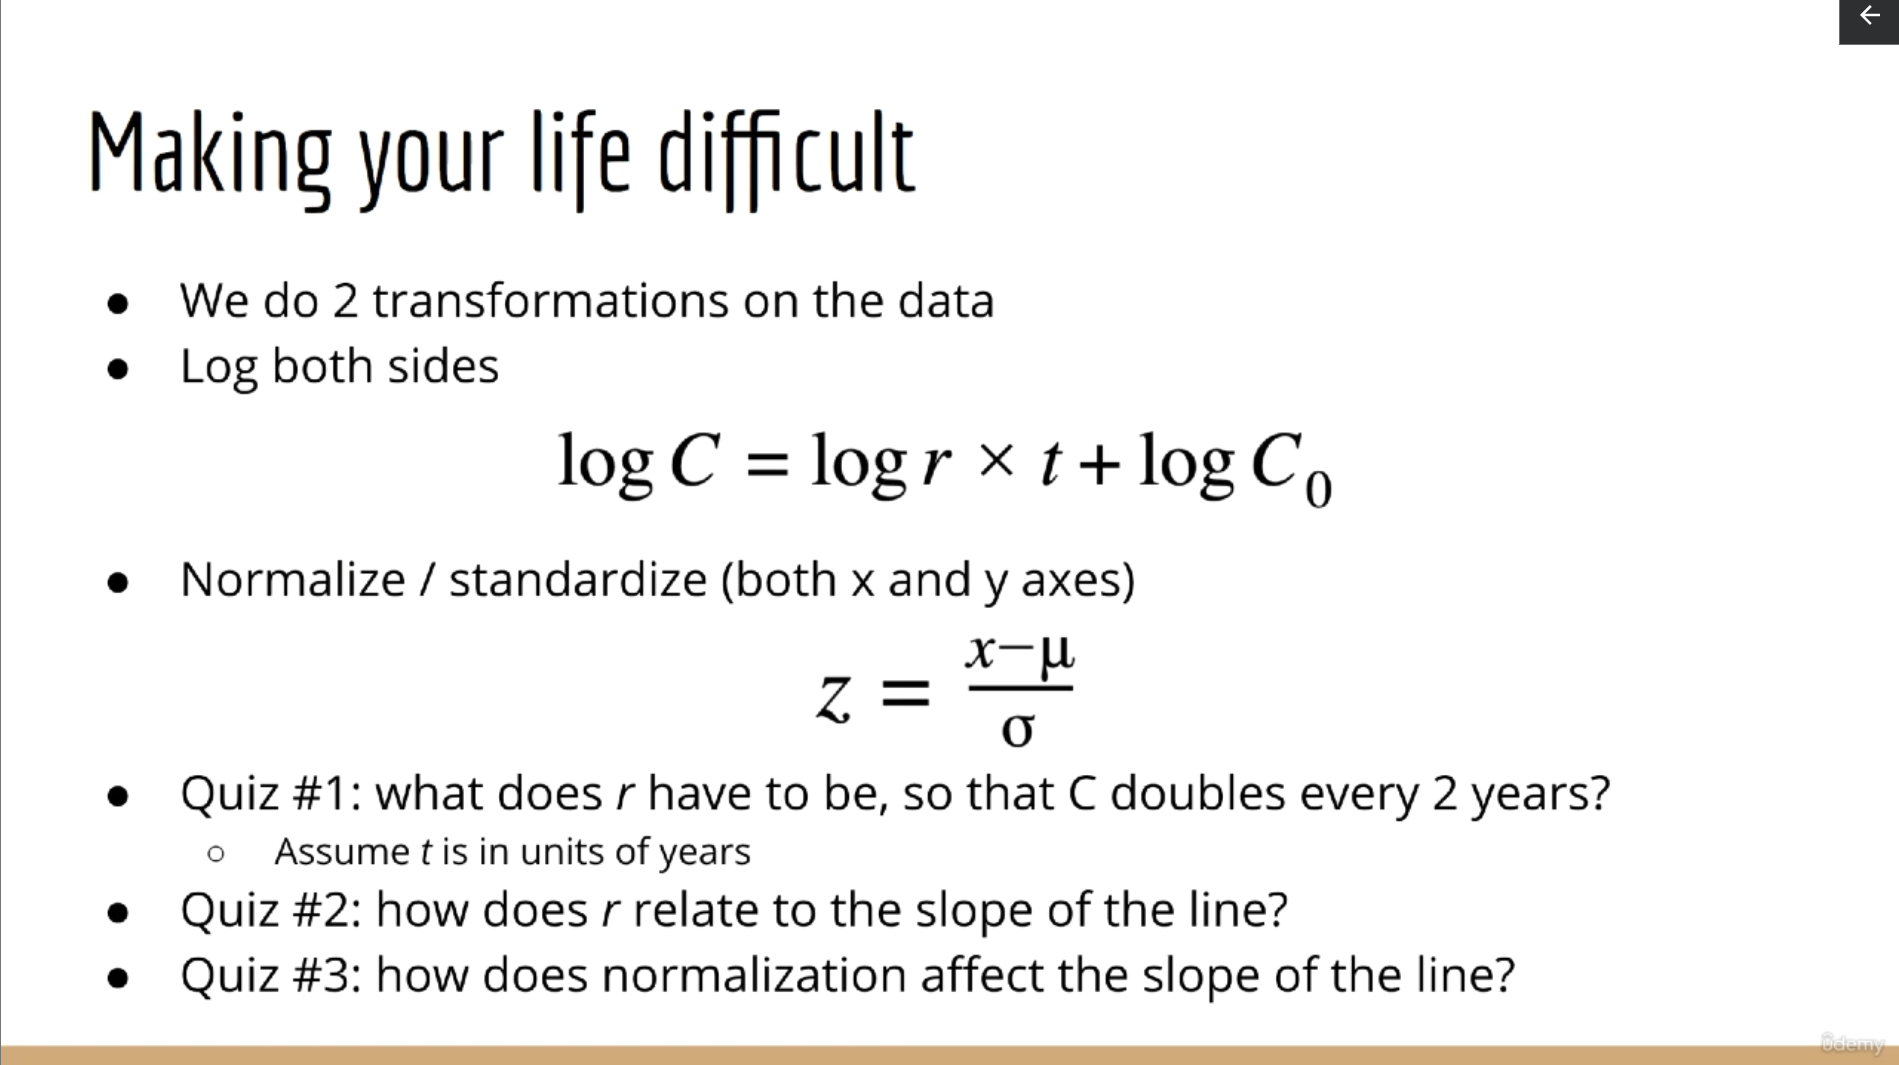

In [28]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [29]:
data = pd.read_csv("./moore.csv", header=None).values
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1].reshape(-1, 1)

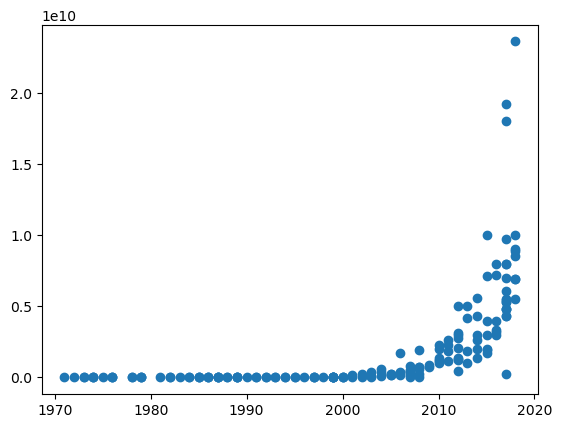

In [30]:
plt.scatter(X, Y)

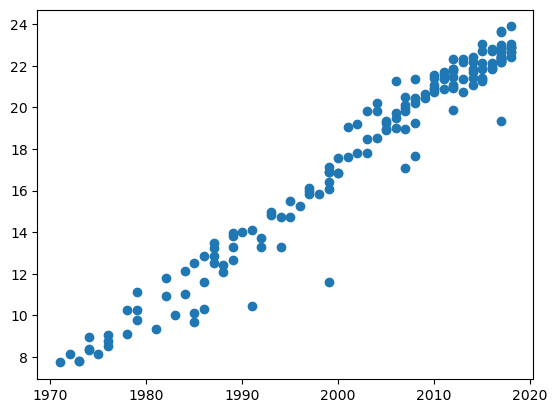

In [31]:
Y = np.log(Y)
plt.scatter(X, Y)

In [32]:
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X - mx) / sx
Y = (Y - my) / sy

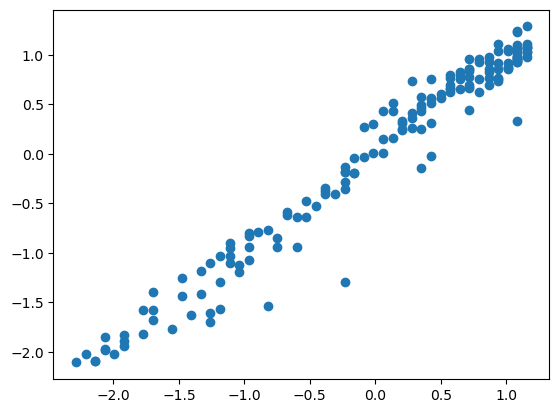

In [33]:
plt.scatter(X, Y)

In [34]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [35]:
model = nn.Linear(1, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [36]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [37]:
n_epochs = 100
losses = []

for it in range(n_epochs):
    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    losses.append(loss.item())

    loss.backward()
    optimizer.step()

    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 3.2755
Epoch 2/100, Loss: 3.1474
Epoch 3/100, Loss: 2.9378
Epoch 4/100, Loss: 2.6836
Epoch 5/100, Loss: 2.4113
Epoch 6/100, Loss: 2.1392
Epoch 7/100, Loss: 1.8791
Epoch 8/100, Loss: 1.6379
Epoch 9/100, Loss: 1.4191
Epoch 10/100, Loss: 1.2237
Epoch 11/100, Loss: 1.0515
Epoch 12/100, Loss: 0.9013
Epoch 13/100, Loss: 0.7711
Epoch 14/100, Loss: 0.6590
Epoch 15/100, Loss: 0.5630
Epoch 16/100, Loss: 0.4812
Epoch 17/100, Loss: 0.4116
Epoch 18/100, Loss: 0.3525
Epoch 19/100, Loss: 0.3026
Epoch 20/100, Loss: 0.2604
Epoch 21/100, Loss: 0.2248
Epoch 22/100, Loss: 0.1949
Epoch 23/100, Loss: 0.1697
Epoch 24/100, Loss: 0.1485
Epoch 25/100, Loss: 0.1307
Epoch 26/100, Loss: 0.1158
Epoch 27/100, Loss: 0.1032
Epoch 28/100, Loss: 0.0927
Epoch 29/100, Loss: 0.0839
Epoch 30/100, Loss: 0.0765
Epoch 31/100, Loss: 0.0704
Epoch 32/100, Loss: 0.0652
Epoch 33/100, Loss: 0.0608
Epoch 34/100, Loss: 0.0572
Epoch 35/100, Loss: 0.0541
Epoch 36/100, Loss: 0.0516
Epoch 37/100, Loss: 0.0495
Epoch 38/1

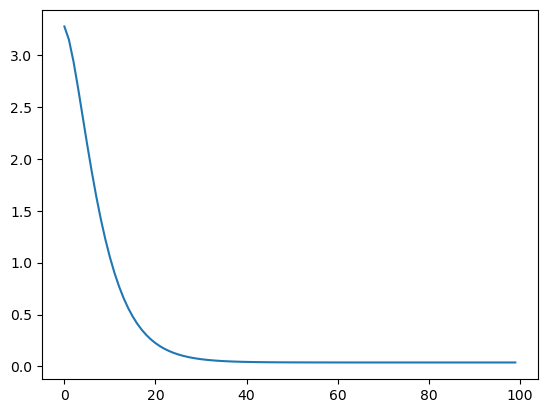

In [38]:
plt.plot(losses)

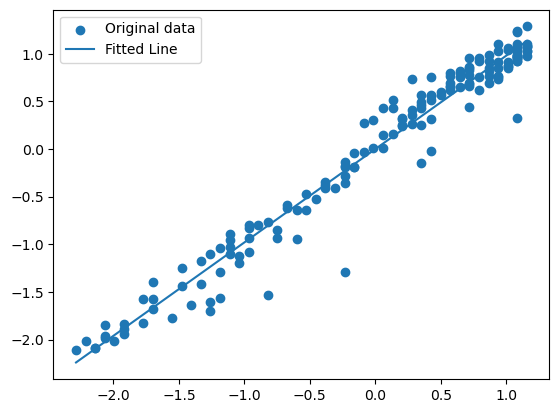

In [46]:
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted Line')
plt.legend()
plt.show()

In [47]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.9802557]] [0.0001557]


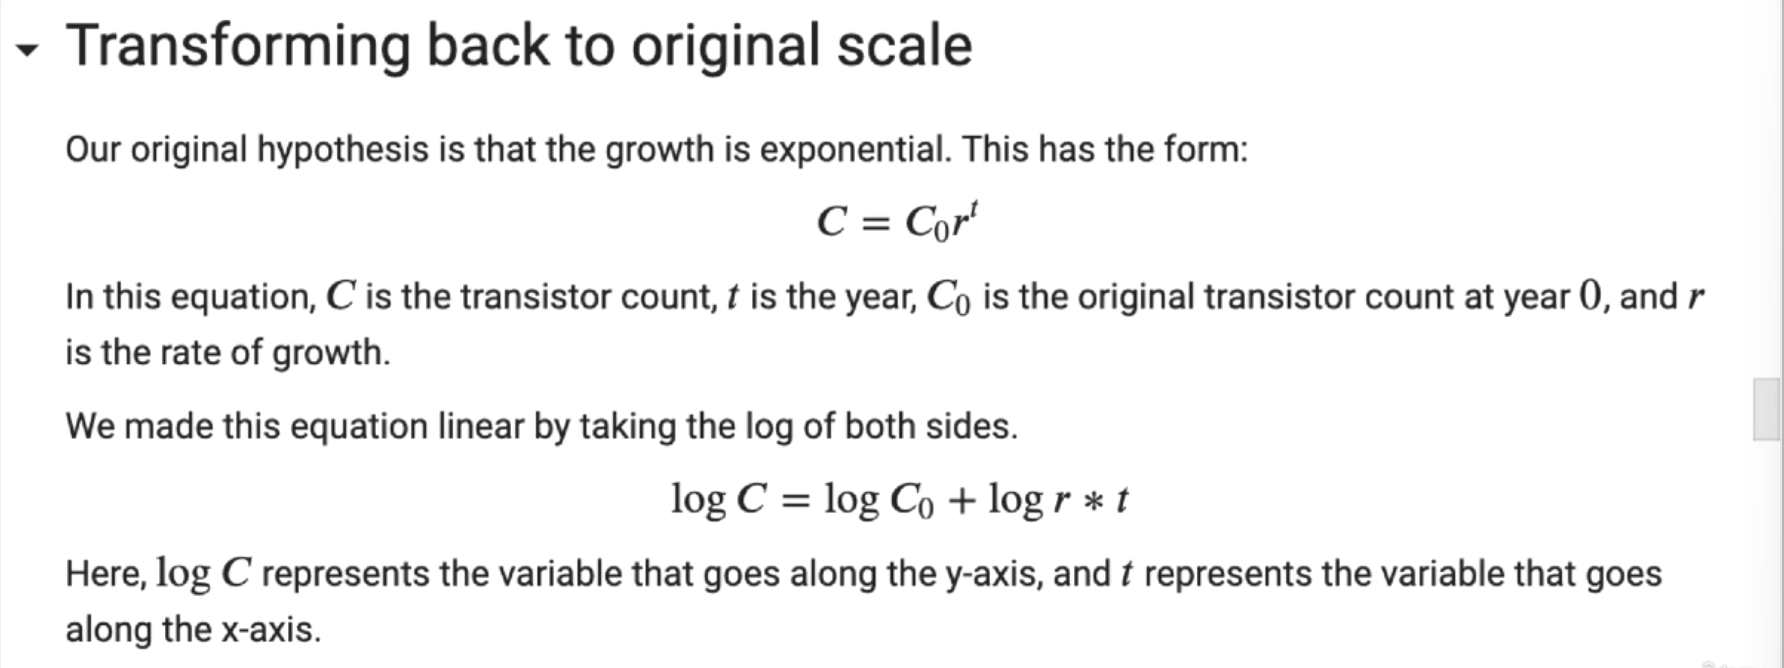

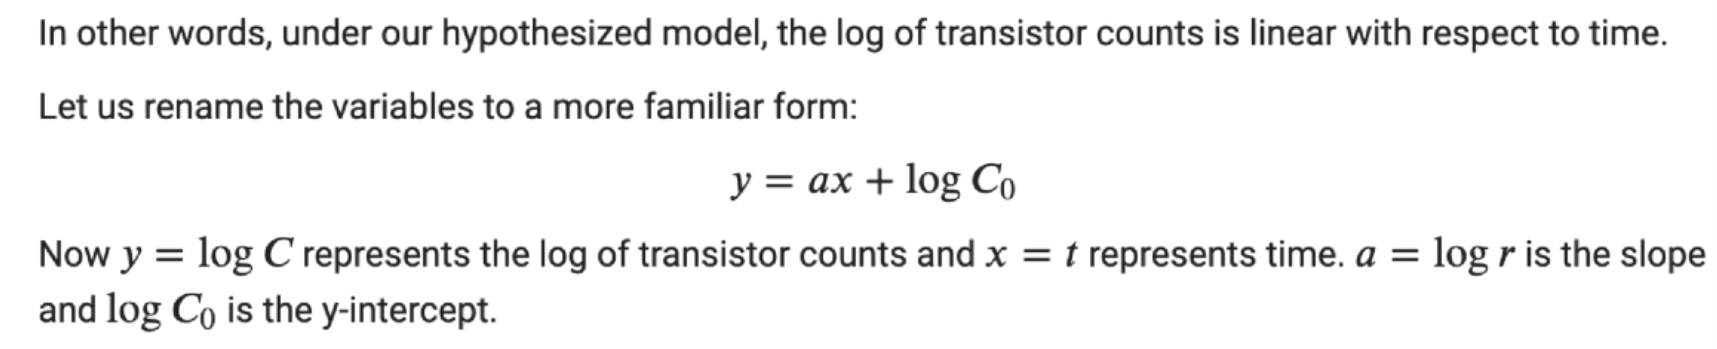

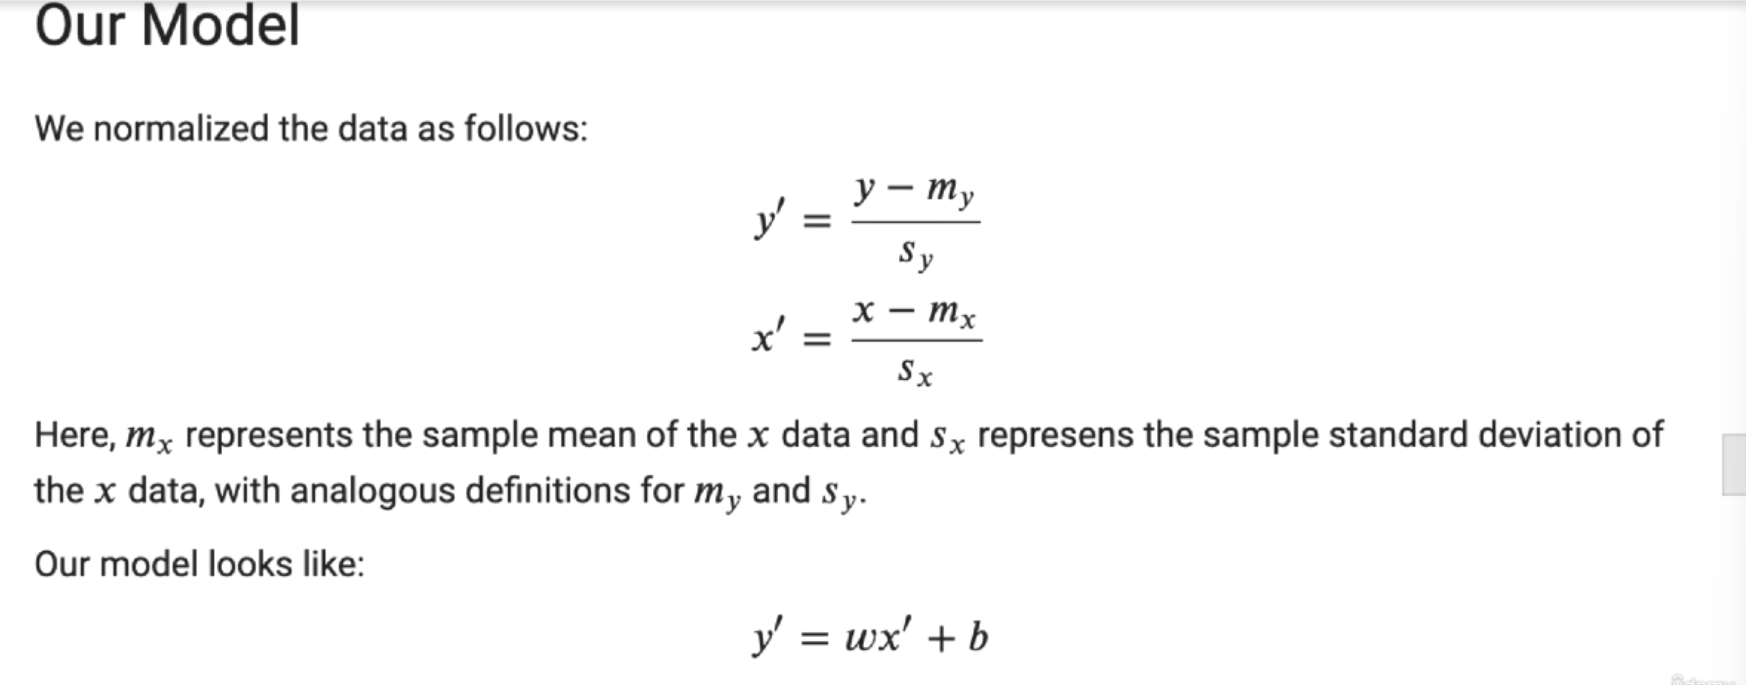

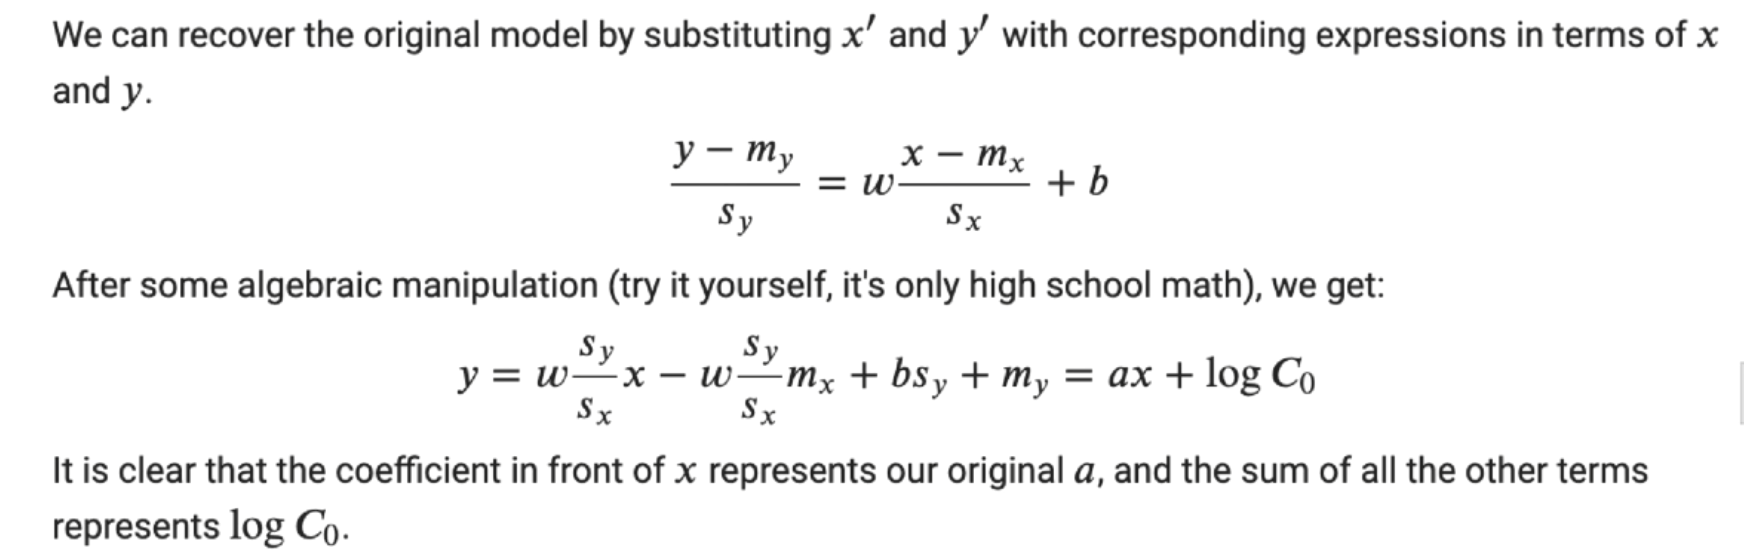

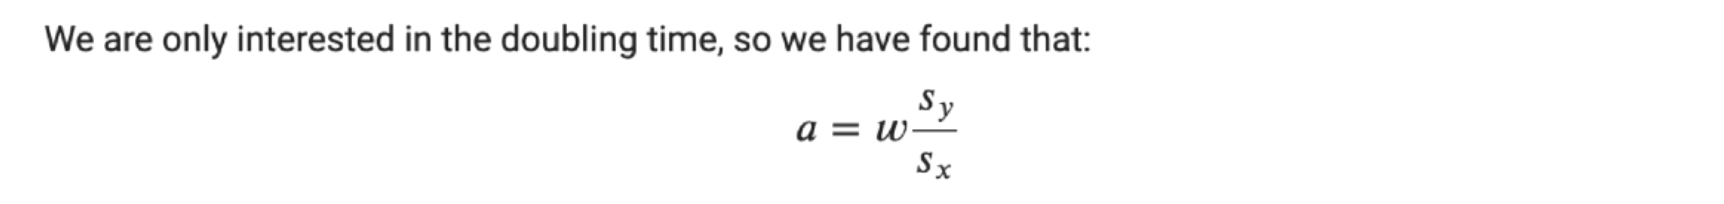

In [48]:
a = w[0, 0] * sy/sx
print(a)

0.3415725854312209


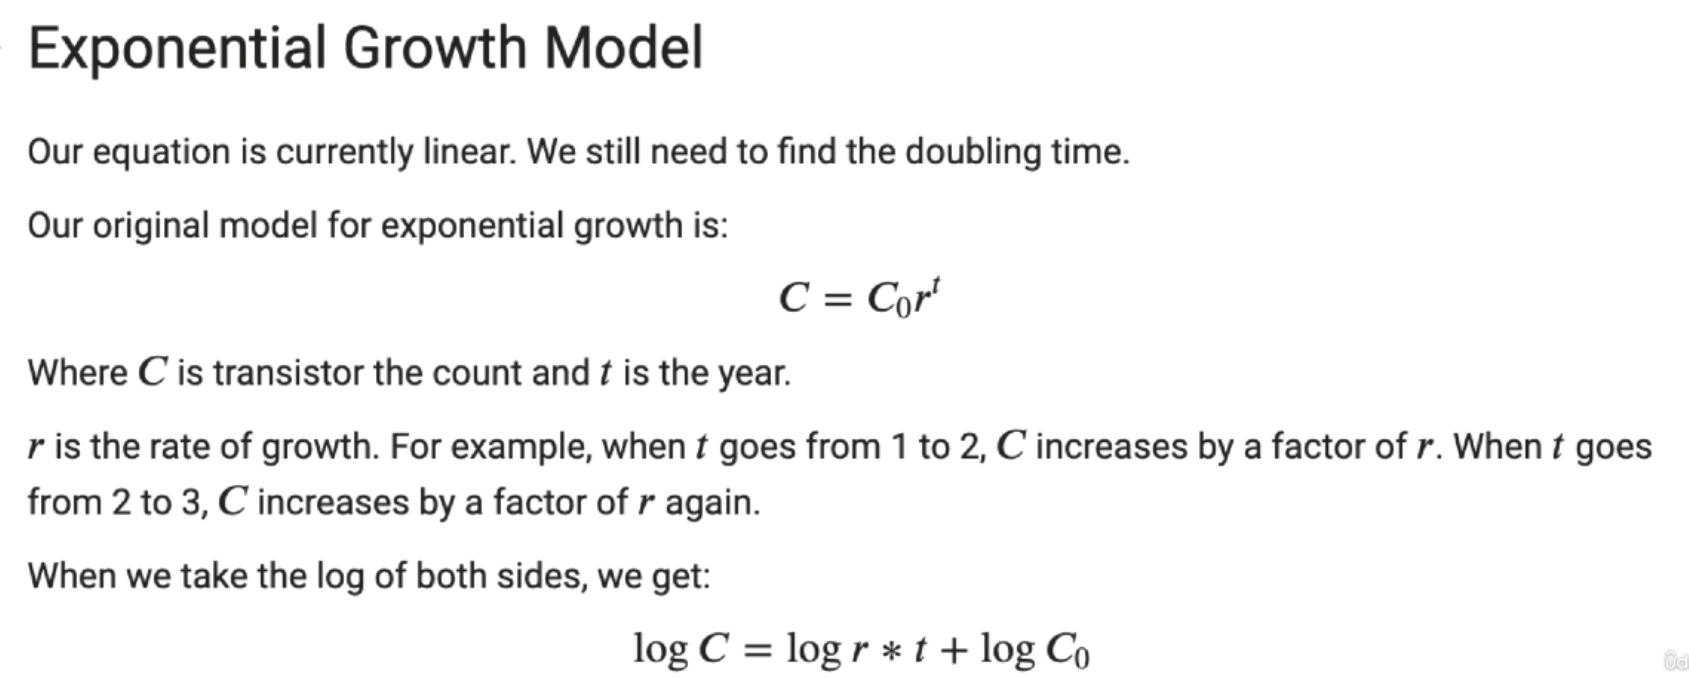

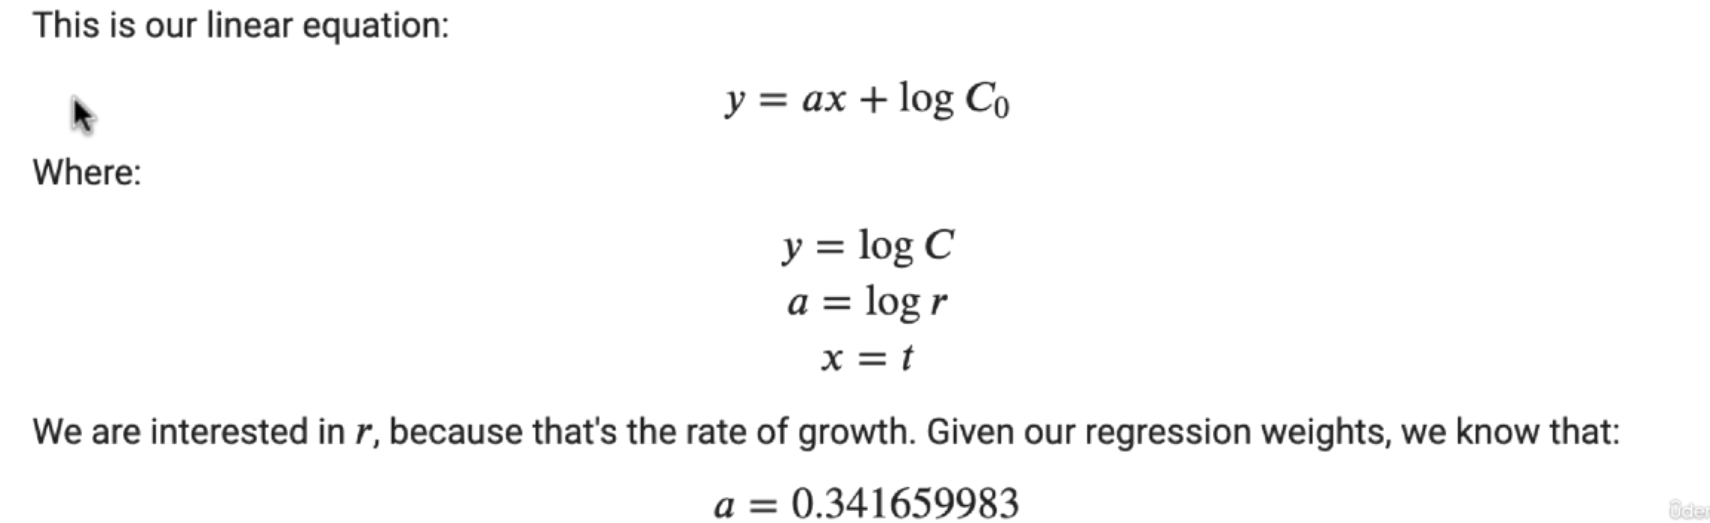

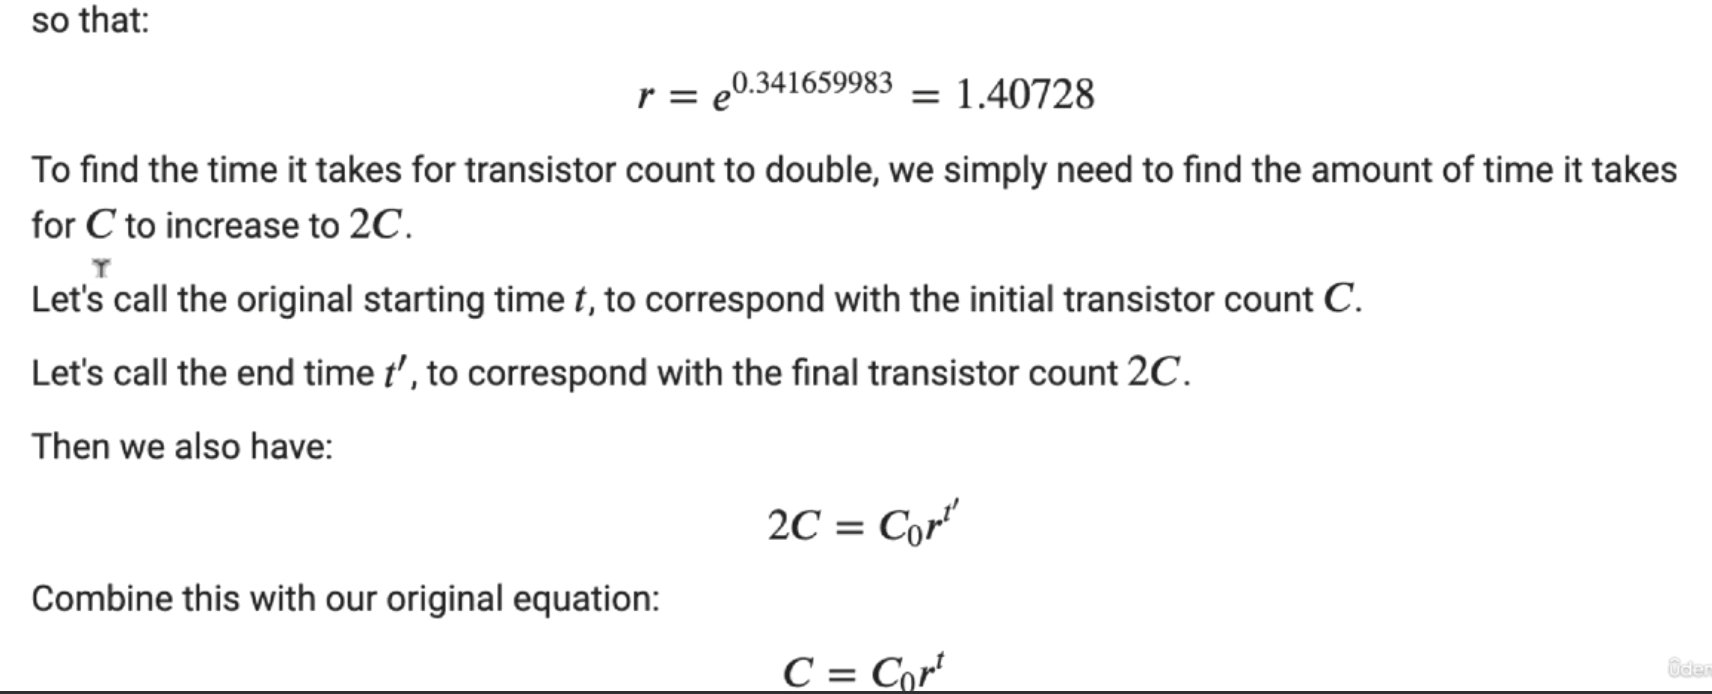

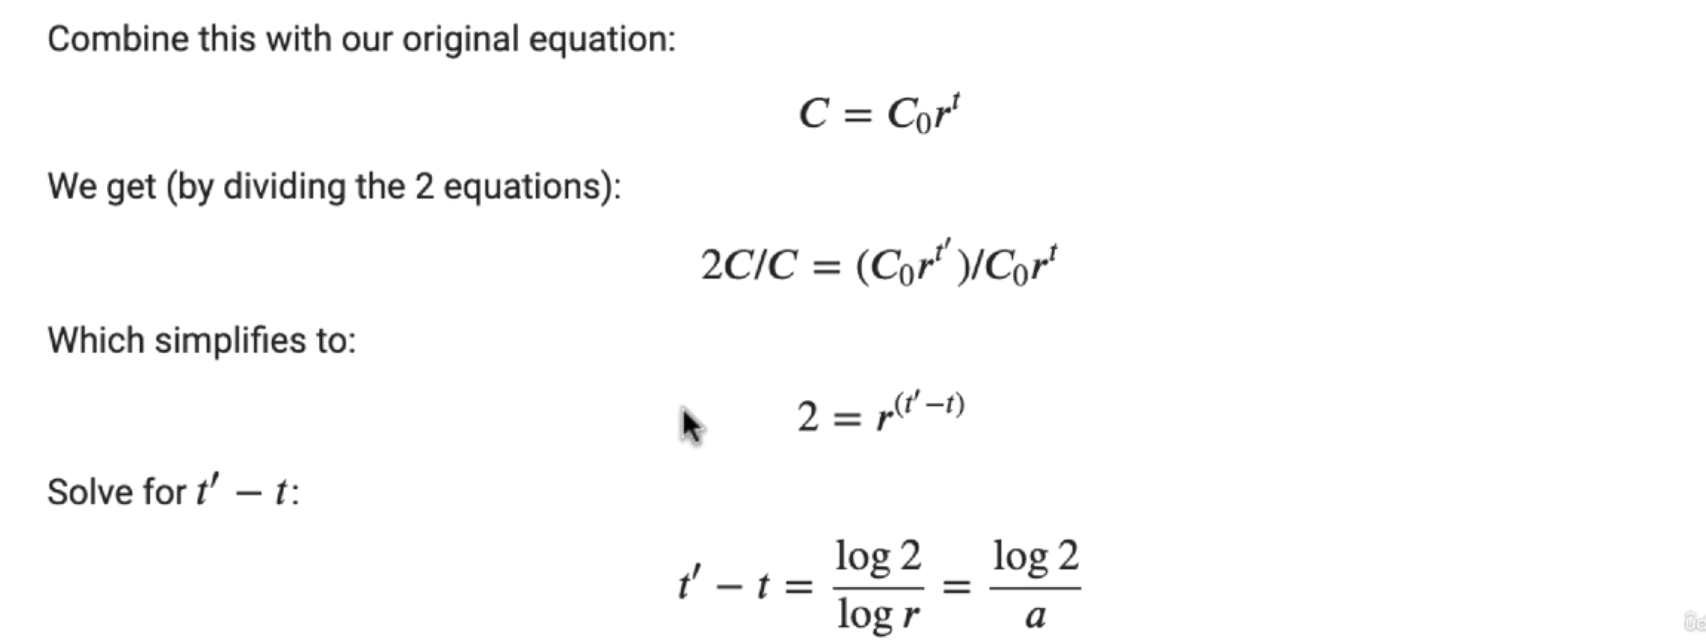

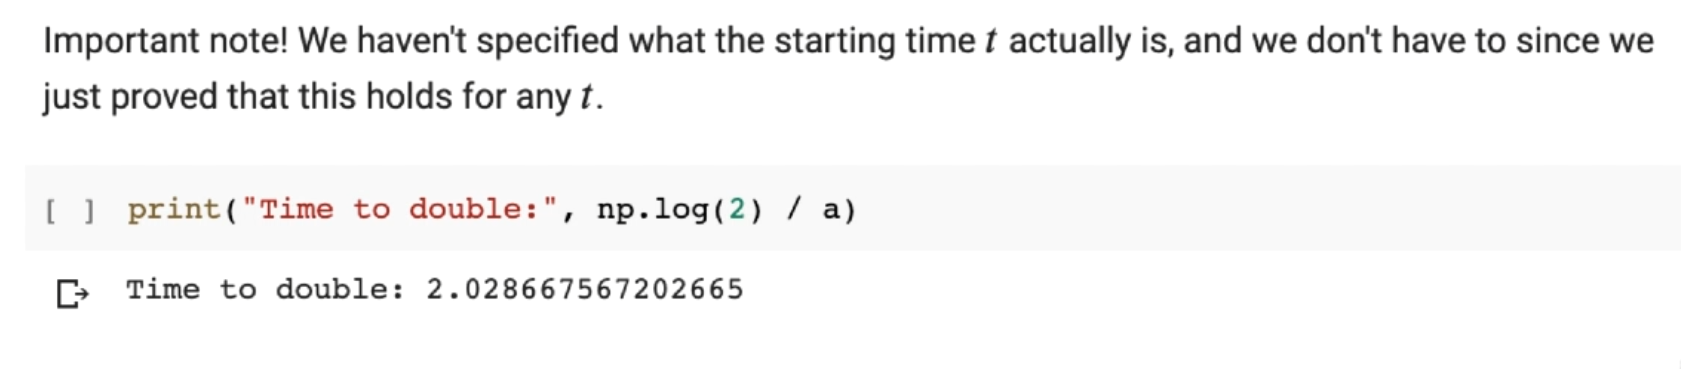

In [49]:
print("Time to double: ", np.log(2) / a)

Time to double:  2.0292822378730317
